<a href="https://colab.research.google.com/github/ramy-arab/Online-Course-Management/blob/main/Tweet_Emotion_Recognition_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.8 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.17.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
import pandas as pd

dataset = pd.read_pickle("merged_training.pkl")

In [ ]:
dataset

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love
...,...,...
566,that was what i felt when i was finally accept...,joy
36236,i take every day as it comes i m just focussin...,fear
76229,i just suddenly feel that everything was fake,sadness
131640,im feeling more eager than ever to claw back w...,joy


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

# Diviser le dataset en features (text) et labels (emotions)
X = dataset['text']
y = dataset['emotions']

# Diviser le dataset en ensembles d'entraînement (80%) et de test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Diviser l'ensemble temporaire en ensembles de validation (50% du 20%) et de test (50% du 20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Afficher les tailles des ensembles
print(f"Taille de l'ensemble d'entraînement: {X_train.shape}")
print(f"Taille de l'ensemble de validation: {X_val.shape}")
print(f"Taille de l'ensemble de test: {X_test.shape}")


Taille de l'ensemble d'entraînement: (333447,)
Taille de l'ensemble de validation: (41681,)
Taille de l'ensemble de test: (41681,)


## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_len = 50  # or choose an appropriate max length for your data
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [ ]:
# Example sentence
sample_sentence = ["I am very happy today because I achieved my goals"]

# Convert the sample sentence to a sequence
sample_sequence = tokenizer.texts_to_sequences(sample_sentence)

# Print the original sentence and the corresponding sequence
print("Original sentence:", sample_sentence)
print("Converted sequence:", sample_sequence)


Original sentence: ['I am very happy today because I achieved my goals']
Converted sequence: [[2, 24, 46, 152, 130, 37, 2, 2229, 11, 1527]]


In [ ]:
# Select an example sentence from your dataset
example_sentence = X_train.iloc[0]  # Taking the first sentence from the training set

# Convert the example sentence to a sequence
example_sequence = tokenizer.texts_to_sequences([example_sentence])

# Print the original sentence and the corresponding sequence
print("Original sentence:", example_sentence)
print("Converted sequence:", example_sequence)



Original sentence: im sharing what weve done and learned only because when i was making decisions about what was best for our family it was really intimidating for me to get good advice from people without feeling pressured from one side or the other
Converted sequence: [[17, 1137, 50, 1668, 241, 4, 924, 114, 37, 33, 2, 21, 214, 1550, 28, 50, 21, 311, 16, 132, 203, 13, 21, 40, 6638, 16, 19, 5, 55, 110, 1571, 59, 62, 179, 8, 566, 59, 68, 539, 35, 6, 115]]


Label Encoding:
Convert your labels (y) into numerical format

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)


## Task 5: Padding and Truncating Sequences
(Ensuring all sequences have the same length by padding shorter ones or truncating longer ones.)

1. Checking length of the tweets
2. Creating padded sequences

First, let's analyze the lengths of your tweets to decide on a reasonable sequence length for padding and truncating

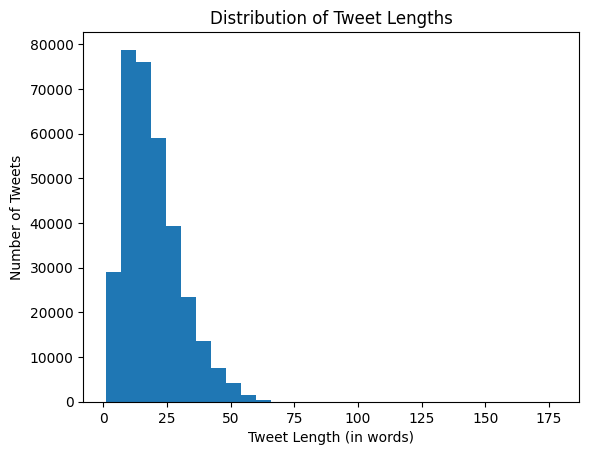

Max length of tweets: 178
Min length of tweets: 1
Average length of tweets: 19.206764493307784


In [ ]:
# Check the lengths of the tweets
tweet_lengths = [len(x.split()) for x in X_train]

# Visualize the distribution of tweet lengths
plt.hist(tweet_lengths, bins=30)
plt.xlabel('Tweet Length (in words)')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweet Lengths')
plt.show()

# Print some statistics
print(f"Max length of tweets: {np.max(tweet_lengths)}")
print(f"Min length of tweets: {np.min(tweet_lengths)}")
print(f"Average length of tweets: {np.mean(tweet_lengths)}")


In [ ]:
# Define the maximum sequence length
max_len = 30  # based on the distribution

# Create padded sequences for training, validation, and test sets
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Verify the shape of the padded sequences
print(f"Padded X_train shape: {X_train_pad.shape}")
print(f"Padded X_val shape: {X_val_pad.shape}")
print(f"Padded X_test shape: {X_test_pad.shape}")


Padded X_train shape: (333447, 30)
Padded X_val shape: (41681, 30)
Padded X_test shape: (41681, 30)


In [ ]:
# Select an example tweet from your dataset
example_tweet = X_train.iloc[0]  # You can change the index to select a different tweet

# Print the original tweet
print("Original tweet:", example_tweet)

# Convert the tweet to a sequence
example_sequence = tokenizer.texts_to_sequences([example_tweet])

# Pad the sequence
example_padded = pad_sequences(example_sequence, maxlen=max_len, padding='post', truncating='post')

# Print the sequence and the padded sequence
print("Converted sequence:", example_sequence)
print("Padded sequence:", example_padded)


Original tweet: im sharing what weve done and learned only because when i was making decisions about what was best for our family it was really intimidating for me to get good advice from people without feeling pressured from one side or the other
Converted sequence: [[17, 1137, 50, 1668, 241, 4, 924, 114, 37, 33, 2, 21, 214, 1550, 28, 50, 21, 311, 16, 132, 203, 13, 21, 40, 6638, 16, 19, 5, 55, 110, 1571, 59, 62, 179, 8, 566, 59, 68, 539, 35, 6, 115]]
Padded sequence: [[  17 1137   50 1668  241    4  924  114   37   33    2   21  214 1550
    28   50   21  311   16  132  203   13   21   40 6638   16   19    5
    55  110]]


In [ ]:
# Convert text to sequences for the entire dataset
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = set(y)
print(classes)

{'love', 'surprise', 'sadness', 'anger', 'fear', 'joy'}


Text(0.5, 1.0, 'Distribution of Tweet Lengths')

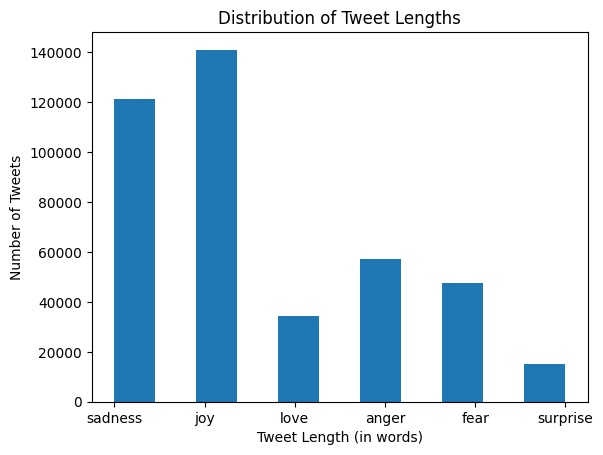

In [ ]:
plt.hist(y ,bins=11)
plt.xlabel('Tweet Length (in words)')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweet Lengths')

In [ ]:
class_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())

In [ ]:
class_to_index

{'love': 0, 'surprise': 1, 'sadness': 2, 'anger': 3, 'fear': 4, 'joy': 5}

In [ ]:
index_to_class

{0: 'love', 1: 'surprise', 2: 'sadness', 3: 'anger', 4: 'fear', 5: 'joy'}

In [ ]:
name_to_id = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [ ]:
train_labels = name_to_id(y)
print(train_labels[0])

2


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Number of unique words (vocab size + 1 for padding)
vocab_size = 10000
embedding_dim = 64  # Dimension of the dense embedding


model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=False),  # LSTM layer with 64 units
    Dropout(0.5),  # Dropout for regularization
    Dense(64, activation='relu'),  # Fully connected layer
    Dense(len(classes), activation='softmax')  # Output layer for multi-class classification
])




In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(classes), activation='softmax')
])


In [ ]:
model.build(input_shape=(None, max_len))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 30, 64)              │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 677,574 (2.58 MB)

 Trainable params: 677,574 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# After compiling, the model will be built when you start training
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 30, 64)              │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 677,574 (2.58 MB)

 Trainable params: 677,574 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Fit the LabelEncoder on the training labels
le = LabelEncoder()

# Transform labels into numeric format
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)


In [ ]:
# Assuming the following have been prepared in earlier steps:
# X_train_pad, X_val_pad, y_train_enc, y_val_enc

# Convert y_train_enc and y_val_enc to numpy arrays if they aren't already
y_train_enc = np.array(y_train_enc)
y_val_enc = np.array(y_val_enc)

print(f"Training samples: {X_train_pad.shape[0]}, Validation samples: {X_val_pad.shape[0]}")


Training samples: 333447, Validation samples: 41681


In [ ]:
# Set the number of epochs and batch size
epochs = 10
batch_size = 32

# Train the model
history = model.fit(
    X_train_pad,
    y_train_enc,
    validation_data=(X_val_pad, y_val_enc),
    epochs=epochs,
    batch_size=batch_size
)


Epoch 1/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 70s 6ms/step - accuracy: 0.6992 - loss: 0.6731 - val_accuracy: 0.9178 - val_loss: 0.1617
Epoch 2/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - accuracy: 0.9194 - loss: 0.1578 - val_accuracy: 0.9216 - val_loss: 0.1441
Epoch 3/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 74s 6ms/step - accuracy: 0.9223 - loss: 0.1443 - val_accuracy: 0.9225 - val_loss: 0.1406
Epoch 4/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 79s 6ms/step - accuracy: 0.9250 - loss: 0.1364 - val_accuracy: 0.9229 - val_loss: 0.1397
Epoch 5/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 83s 6ms/step - accuracy: 0.9283 - loss: 0.1288 - val_accuracy: 0.9232 - val_loss: 0.1399
Epoch 6/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 82s 6ms/step - accuracy: 0.9306 - loss: 0.1210 - val_accuracy: 0.9227 - val_loss: 0.1432
Epoch 7/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 82s 6ms/step - accuracy: 0.9323 - loss: 0.1147 - val_accuracy: 0.9230 - val_loss: 0.1466
Epoch 8/10
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 81s 6ms/step - accuracy: 

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

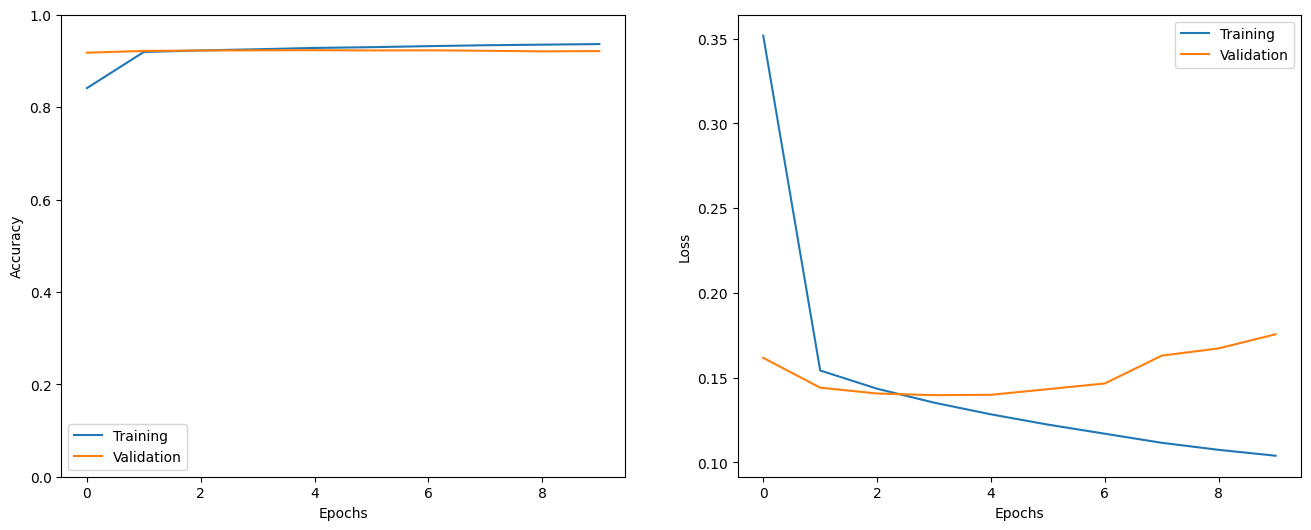

In [ ]:
# Visualize the training history
show_history(history)


In [ ]:
# Ensure that your test data is ready
print(f"Test samples: {X_test_pad.shape[0]}")


Test samples: 41681


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test_enc)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1303/1303 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9202 - loss: 0.1788
Test Loss: 0.18188579380512238
Test Accuracy: 0.9188119173049927


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_pad)

# Convert predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Look at an example
index = 0  # Change this to look at different examples
print(f"Text: {X_test.iloc[index]}")
print(f"True Label: {index_to_class[y_test_enc[index]]}")
print(f"Predicted Label: {index_to_class[y_pred_classes[index]]}")


1303/1303 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Text: i told him only of my feelings for you not of any of our actions he assured her reaching out to caress her cheek
True Label: sadness
Predicted Label: sadness


              precision    recall  f1-score   support

        love       0.91      0.92      0.92      5681
    surprise       0.88      0.89      0.89      4601
     sadness       0.97      0.90      0.93     14263
       anger       0.75      0.96      0.84      3413
        fear       0.97      0.93      0.95     12197
         joy       0.74      0.96      0.83      1526

    accuracy                           0.92     41681
   macro avg       0.87      0.93      0.89     41681
weighted avg       0.93      0.92      0.92     41681



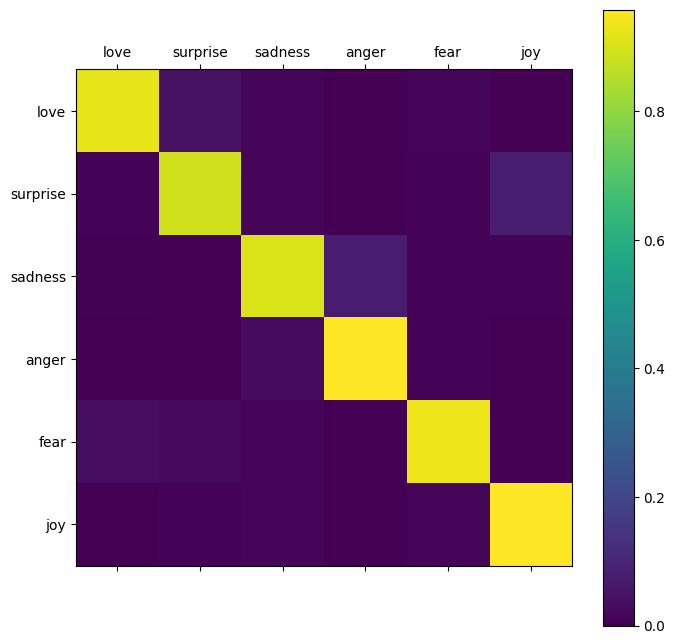

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate a classification report
print(classification_report(y_test_enc, y_pred_classes, target_names=classes))

# Display the confusion matrix
show_confusion_matrix(y_test_enc, y_pred_classes, classes)
